In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [0]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt

In [0]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datos/dima_train_with_features_6.csv",
                    dtype={ \
                            'antiguedad' : np.float32, 
                            'habitaciones' : np.float32, 
                            'garages' : np.float32, 
                            'banos' : np.float32,
                            'metroscubiertos' : np.float32, 
                            'metrostotales' : np.float32, 
                            'idzona' : np.float32, 
                            'lat' : np.float32, 
                            'lng' : np.float32, 
                            'gimnasio' : np.float32, 
                            'usosmultiples' : np.float32, 
                            'piscina' : np.float32, 
                            'escuelascercanas' : np.float32,
                            'centroscomercialescercanos' : np.float32, 
                            'precio' : np.float32, 
                            'servicios_cercanos' : np.float32,
                            'utilidades_extra' : np.float32, 
                            'tipodepropiedad_mean_antiguedad' : np.float32,
                            'tipodepropiedad_mean_habitaciones ' : np.float32, 
                            'tipodepropiedad_mean_garages' : np.float32,
                            'tipodepropiedad_mean_banos' : np.float32, 
                            'tipodepropiedad_mean_metroscubiertos' : np.float32,
                            'tipodepropiedad_mean_utilidades_extra' : np.float32,
                            'tipodepropiedad_mean_servicios_cercanos' : np.float32, 
                            'ciudad_mean_antiguedad' : np.float32,
                            'ciudad_mean_habitaciones' : np.float32, 
                            'ciudad_mean_garages' : np.float32, 
                            'ciudad_mean_banos': np.float32,
                            'ciudad_mean_metroscubiertos' : np.float32, 
                            'ciudad_mean_utilidades_extra' : np.float32,
                            'ciudad_mean_servicios_cercanos' : np.float32, 
                            'provincia_mean_antiguedad' : np.float32,
                            'provincia_mean_habitaciones' : np.float32, 
                            'provincia_mean_garages' : np.float32,
                            'provincia_mean_banos' : np.float32, 
                            'provincia_mean_metroscubiertos' : np.float32,
                            'provincia_mean_utilidades_extra' : np.float32, 
                            'provincia_mean_servicios_cercanos' : np.float32,
                            'ciudad_mean_lat' : np.float32, 
                            'ciudad_mean_lng' : np.float32, 
                            'provincia_mean_lat' : np.float32,
                            'provincia_mean_lng' : np.float32, 
                            'coseno_distancia_angular_al_centro_ciudad' : np.float32,
                            'coseno_distancia_angular_al_centro_provincia' : np.float32,
                            'coseno_distancia_angular_al_centro_pais' : np.float32, 
                            'año' : np.float32, 
                            'mes' : np.float32, 
                            'dia' : np.float32,
                            'metros_no_cubiertos' : np.float32, 
                            'cantidad_espacios' : np.float32, 
                            'metros_x_espacio' : np.float32,
                            'metros_x_habitaciones' : np.float32, 
                            'metros_x_garages' : np.float32, 
                            'metros_x_banos' : np.float32,
                            'metros_x_utilidades_extra' : np.float32, 
                            'ratio_metros_cubiertos' : np.float32,
                            'distancia_minima_Terreno_comercial' : np.float32,
                            'distancia_minima_Local_Comercial' : np.float32,
                            'distancia_minima_Oficina_comercial' : np.float32,
                            'distancia_minima_Local_en_centro_comercial' : np.float32,
                            'distancia_minima_Bodega_comercial' : np.float32, 
                            'banos_preciopromedio_ciudad' : np.float32,
                            'habitaciones_preciopromedio_ciudad' : np.float32, 
                            'garages_preciopromedio_ciudad' : np.float32,
                            'banos_preciopromedio_metroscubiertos' : np.float32,
                            'habitaciones_preciopromedio_metroscubiertos' : np.float32,
                            'garages_preciopromedio_metroscubiertos' : np.float32, 
                            'precio_x_m2' : np.float32,
                            'tipodepropiedad_mean_precio' : np.float32, 
                            'titulo_cantidad_palabras_importantes' : np.float32,
                            'descripcion_cantidad_palabras_importantes' : np.float32,
                            'direccion_cantidad_palabras_importantes' : np.float32,
                            'titulo_cantidad_caracteres_en_palabras_importantes' : np.float32,
                            'descripcion_cantidad_caracteres_en_palabras_importantes' : np.float32,
                            'direccion_cantidad_caracteres_en_palabras_importantes' : np.float32,
                            'titulo_longitud_media_de_palabra' : np.float32,
                            'descripcion_longitud_media_de_palabra' : np.float32,
                            'direccion_longitud_media_de_palabra' : np.float32, 
                            'titulo_cantidad_stopwords' : np.float32,
                            'descripcion_cantidad_stopwords' : np.float32, 
                            'direccion_cantidad_stopwords' : np.float32,
                            'titulo_cantidad_signos_puntacion' : np.float32,
                            'descripcion_cantidad_signos_puntacion' : np.float32,
                            'direccion_cantidad_signos_puntacion' : np.float32,
                            'direccion_cantidad_palabras_en_mayuscula' : np.float32,
                            'direccion_cantidad_titulos' : np.float32, 
                            'titulo_cantidad_palabras_top_k' : np.float32,
                            'descripcion_cantidad_palabras_top_k' : np.float32,
                            'direccion_cantidad_palabras_top_k' : np.float32,
                            'titulo_cantidad_palabras_bottom_k' : np.float32,
                            'descripcion_cantidad_palabras_bottom_k' : np.float32,
                            'direccion_cantidad_palabras_bottom_k' : np.float32,
                            'titulo_cantidad_prefijos_top_k' : np.float32, 
                            'descripcion_cantidad_prefijos_top_k' : np.float32,
                            'direccion_cantidad_prefijos_top_k' : np.float32, 
                            'titulo_cantidad_postfijos_top_k' : np.float32,
                            'descripcion_cantidad_postfijos_top_k' : np.float32,
                            'direccion_cantidad_postfijos_top_k' : np.float32, 
                            '0' : np.float32, 
                            '1' : np.float32, 
                            '2' : np.float32, 
                            '3' : np.float32, 
                            '4' : np.float32, 
                            '5' : np.float32, 
                            '6' : np.float32,
                            '7' : np.float32,
                            'distancia_euclideana_al_origen' : np.float32, 
                            'distancia_minima_comercial' : np.float32,
                            'coseno_maximo_ciudad_pais' : np.float32,
                            'ciudad_mean_antiguedad_sobre_provincia_mean_antiguedad' : np.float32,
                            'tipodepropiead_mean_utilidades_extra_sobre_ciudad_mean_utilidades_extra' : np.float32,
                            'antiguedad_sobre_tipodepropiedad_mean_antiguedad' : np.float32,
                            'direccion_cantidad_al_menos_una_mayuscula' : np.float32,
                            'direccion_cantidad_fijos_top_k' : np.float32, 
                            'titulo_cantidad_fijos_top_k' : np.float32,
                            'titulo_palabras_top_k_sobre_total_palabras' : np.float32,
                            'ciudad_distancia_al_origen':  np.float32, 
                            'ciudad_mean_mean_todas' : np.float32,
                            'ciudad_mean_antiguedad_sobre_mean_metrocubiertos' : np.float32
                            }
                    )

In [0]:
train.set_index('id', inplace = True)

In [0]:
TARGET = "precio"
FEATURES = ['metrostotales',
 'metroscubiertos',
 'idzona',
 'lat',
 'antiguedad',
 'metros_x_espacio',
 'metros_x_habitaciones',
 'metros_x_banos',
 'metros_x_garages',
 'descripcion_longitud_media_de_palabra',
 'habitaciones_preciopromedio_ciudad',
 'banos_preciopromedio_ciudad',
 'distancia_minima_Local_en_centro_comercial',
 'titulo_longitud_media_de_palabra',
 'lng',
 'distancia_minima_Local_Comercial',
 'distancia_minima_Bodega_comercial',
 'garages_preciopromedio_ciudad',
 'distancia_minima_Terreno_comercial',
 'distancia_minima_Oficina_comercial',
 'habitaciones',
 'coseno_distancia_angular_al_centro_ciudad',
 'dia',
 'tipodepropiead_mean_utilidades_extra_sobre_ciudad_mean_utilidades_extra',
 'descripcion_cantidad_stopwords',
 'descripcion_cantidad_palabras_top_k',
 'descripcion_cantidad_caracteres_en_palabras_importantes',
 'descripcion_cantidad_signos_puntacion',
 'titulo_cantidad_caracteres_en_palabras_importantes',
 'descripcion_cantidad_palabras_importantes',
 'direccion_longitud_media_de_palabra',
 'antiguedad_sobre_tipodepropiedad_mean_antiguedad',
 'mes',
 'habitaciones_preciopromedio_metroscubiertos',
 'titulo_palabras_top_k_sobre_total_palabras',
 'metros_x_utilidades_extra',
 'distancia_minima_comercial',
 'precio_x_m2',
 'año']

In [0]:
datos = train[FEATURES]
precio = train[TARGET]

In [0]:
def hyperopt_train_test(params):
    modelo = XGBRegressor(**params)
    return cross_val_score(modelo, datos, precio, scoring="neg_mean_absolute_error", cv=4).mean()

In [0]:
espacio_xgb = {
    "objective" : "reg:squarederror",
    "n_estimators" : hp.choice("n_estimators", range(700, 1400)),
    "min_child_weight" : hp.choice("min_child_weight", range(1,10)),
    "max_depth" : hp.choice("max_depth", range(3, 11)),
    "learning_rate" : hp.uniform("learning_rate", 0.005, 0.15),
    "reg_lambda" : hp.uniform("reg_lambda", 0.03, 1),
    "gamma" : hp.uniform("gamma", 0, 3),
    "colsample_bytree" : hp.uniform("colsample_bytree", 0.5, 1),
    "subsample" : hp.uniform("subsample", 0.5, 1)
}

In [0]:
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [0]:
trials = Trials()

In [13]:
best = fmin(f, espacio_xgb, algo=tpe.suggest, max_evals=15, trials=trials)

100%|██████████| 15/15 [10:51:50<00:00, 2780.91s/it, best loss: 526084.84375]


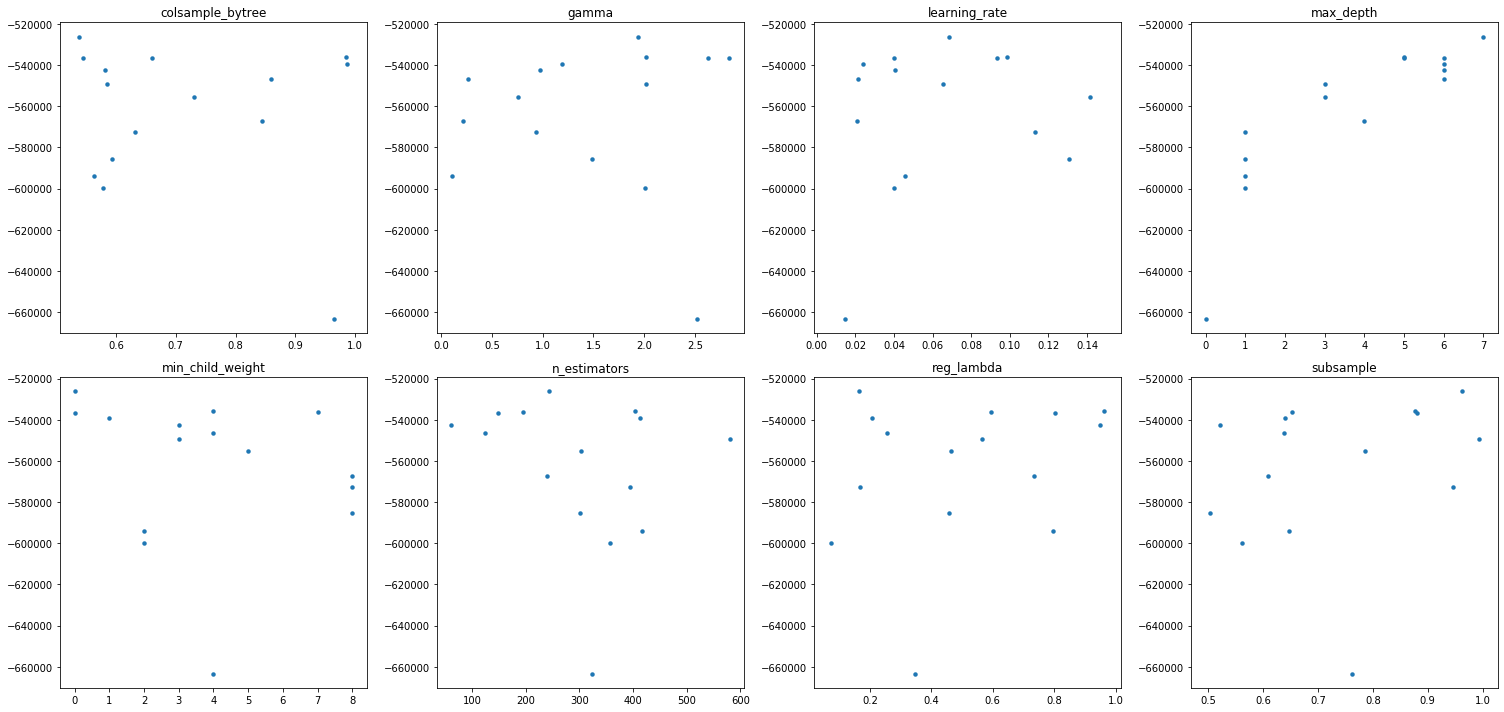

In [18]:
hyperp = ["colsample_bytree", "gamma", "learning_rate", "max_depth", "min_child_weight",
            "n_estimators", "reg_lambda", "subsample"]
fig, a = plt.subplots(2, 4, figsize=(21, 10))
for (i, e) in enumerate(hyperp):
    x = [t["misc"]["vals"][e] for t in trials if ("loss" in t["result"])]
    y = [-t["result"]["loss"] for t in trials if ("loss" in t["result"])]
    a[int(i/4), i%4].scatter(x, y, s=20, linewidth=0.01)
    a[int(i/4), i%4].set_title(e)
    
plt.tight_layout()

In [14]:
best

{'colsample_bytree': 0.5391492353697619,
 'gamma': 1.9431723255672306,
 'learning_rate': 0.06832619437670823,
 'max_depth': 7,
 'min_child_weight': 0,
 'n_estimators': 243,
 'reg_lambda': 0.1654632901595984,
 'subsample': 0.9627179797311021}

In [15]:
space_eval(espacio_xgb, best)

{'colsample_bytree': 0.5391492353697619,
 'gamma': 1.9431723255672306,
 'learning_rate': 0.06832619437670823,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 943,
 'objective': 'reg:squarederror',
 'reg_lambda': 0.1654632901595984,
 'subsample': 0.9627179797311021}

In [0]:
xgb = XGBRegressor(
    colsample_bytree = 0.5391492353697619,
    gamma = 1.9431723255672306,
    learning_rate = 0.06832619437670823,
    max_depth = 10,
    min_child_weight = 1,
    n_estimators = 943,
    objective = 'reg:squarederror',
    reg_lambda = 0.1654632901595984,
    subsample = 0.9627179797311021
)

In [0]:
predictor = xgb.fit(datos, precio)

Text(0, 0.5, 'Feature Importance Score')

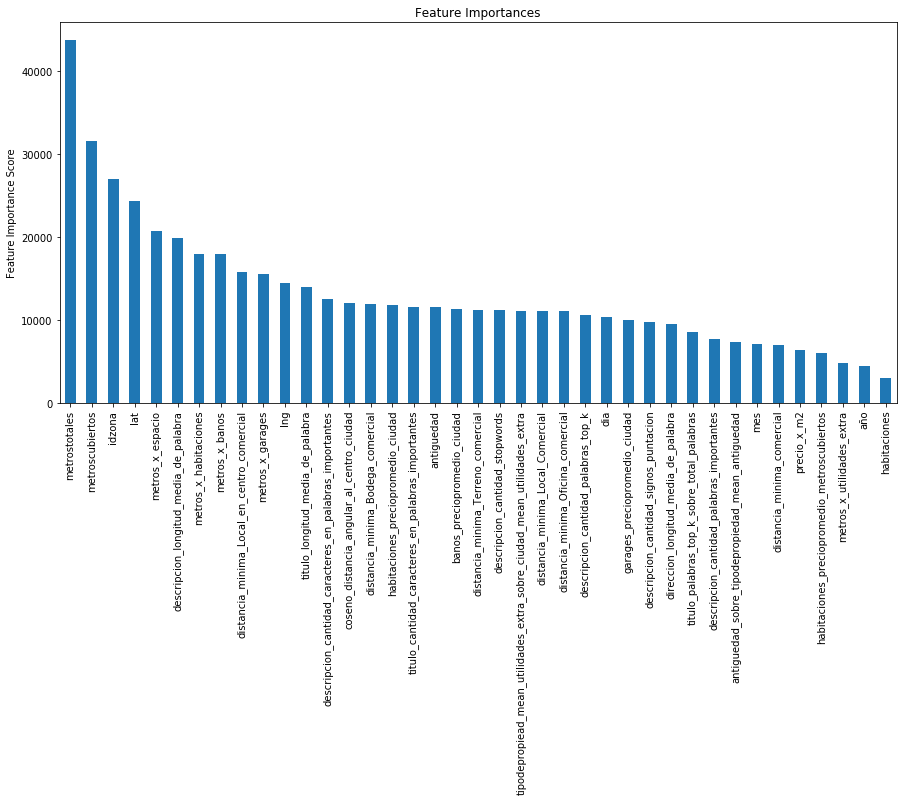

In [19]:
feat_imp = pd.Series(predictor.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(15, 7))
plt.ylabel('Feature Importance Score')